# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


# Load Data

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [ ]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# check null and duplicated values:
print('Before Cleaning Data')
print('Null values:\n', df.isnull().sum())
print('='*100)
print('Duplicated Values:\n', df.duplicated().sum())

if df.isnull().values.any() >= 1:
  df.dropna(inplace=True)
  print('Dropped Null Values')
else:
  print('No Null Values')
if df.duplicated().sum() >= 0:
  df.drop_duplicates(inplace = True)
  print('Dropped Duplicated Values')
else:
  print('No Duplicated Values')

print('After Cleaning Data')
print('Null Values:\n', df.isnull().sum())
print('='*100)
print('Duplicated Values:\n', df.duplicated().sum())

Before Cleaning Data
Null values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Duplicated Values:
 0
No Null Values
Dropped Duplicated Values
After Cleaning Data
Null Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight          

**Understand Dataset**
  - Dataset Structures:

    - 205 rows and 26 columns Feature Overview:

    - Numericial features: `car_ID`, `symboling`, `wheelbase`, `carlength`, `carwidth`, `carheight`, `curbweight`, `engunesize`, `boreratio`, `stroke`, `compressionratio`, `horsepower`, `peakrpm`, `cityrpm`, `highwaympg`, `price`.

    - Categorical features: `CarName`, `fueltype`, `aspiration`, `doornumber`, `carbody`, `drivewheel`,`enginelocation`, `enginetype`, `cylindernumber`, `fuelsystem`.

In [ ]:
# Statistical sumary: numerical features
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**General Overview**
* `price` is from 5118 to 45400 with average of 13276 and a standard deviation 7988 - a highly skewed distribution.
**Key Feature**
* `wheelbase` (86.6 - 120.9)
* `carlength` (141 - 208)
* `carwidth` (60.3 – 72.3)
* `curbweight` (1,488 – 4,066)
* `enginesize` (61 – 326)
* `horsepower` (48 – 288)
* `compressionratio` (7 – 23)
* `citympg` / `highwaympg` (13 – 49 / 16 – 54)



In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
CarName,205,147,peugeot 504,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [ ]:
# Outlier Detection:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print('Outlier check:')
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  outlier = ((df[col] < (Q1 - 1.5 * IQR)) | ((df[col] > (Q3 + 1.5 * IQR)))).sum()
  if outlier > 0:
    print(f'{col}: {outlier} outlier')


Outlier check:
wheelbase: 3 outlier
carlength: 1 outlier
carwidth: 8 outlier
enginesize: 10 outlier
stroke: 20 outlier
compressionratio: 28 outlier
horsepower: 6 outlier
peakrpm: 2 outlier
citympg: 2 outlier
highwaympg: 3 outlier
price: 15 outlier


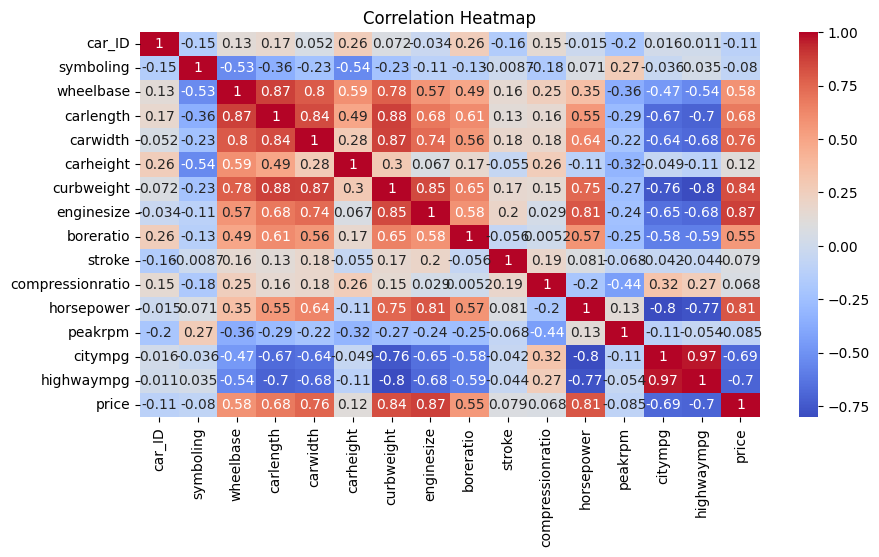

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm', annot =True)
plt.title('Correlation Heatmap')
plt.show()

**Data Correlation**

  The heat map show the strong correlation of price are `wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`,`boreratio` , `horsepower`

In [ ]:
# Split CarName Column:
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing spelling mistake in brand name of car:
  - maxda -> mazda
  - nissan -> Nissan
  - porcshce -> porsche
  - toyouta -> toyota
  - vokswagen, vw -> volkswagen

In [ ]:
#Fix Spelling CarName
df['CarName'] = df['CarName'].replace('maxda','mazda')
df['CarName'] = df['CarName'].replace('Nissan','nissan')
df['CarName'] = df['CarName'].replace('porcshce','porsche')
df['CarName'] = df['CarName'].replace('toyouta','toyota')
df['CarName'] = df['CarName'].replace('vokswagen','volkswagen')
df['CarName'] = df['CarName'].replace('vw','volkswagen')
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.drop(columns ='car_ID', inplace = True)

# Pre-Visualization

# Univariate Analysis


In [ ]:
cat_columns = df.select_dtypes(include='object')
num_columns = df.select_dtypes(exclude='object')
print(cat_columns.columns)
print(num_columns.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [ ]:
num_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']
cat_cols = ['CarName','fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

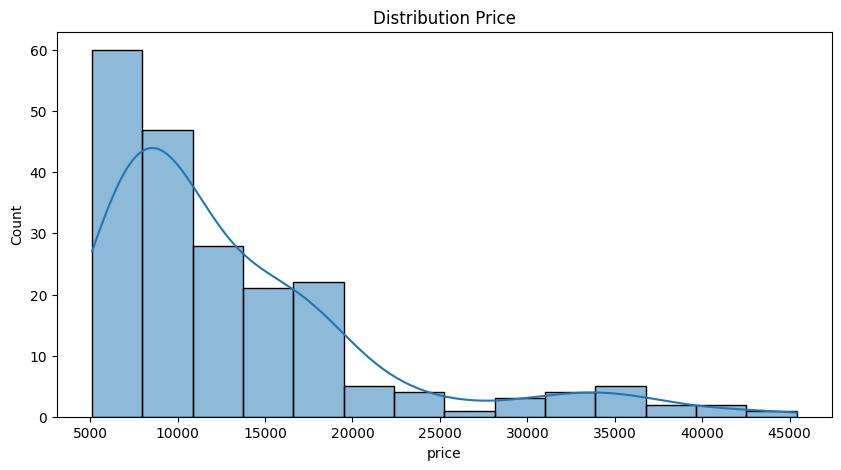

In [ ]:
# distribution target feature
plt.figure(figsize = (10,5))
sns.histplot(df['price'], kde = True)
plt.title('Distribution Price')
plt.show()

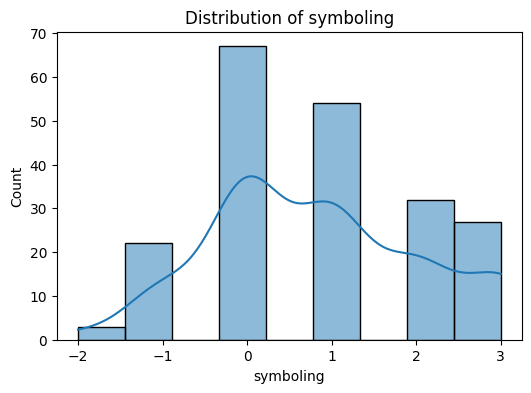

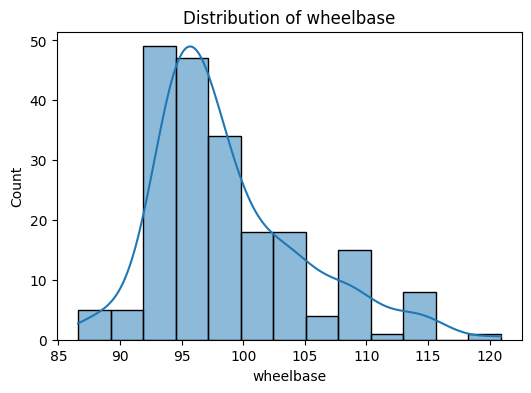

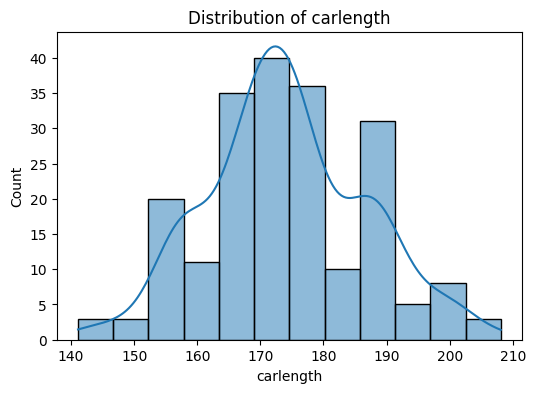

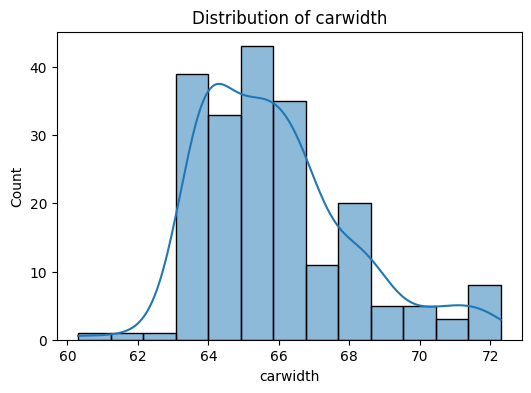

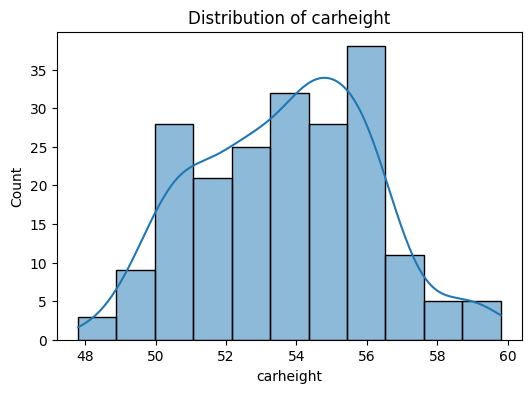

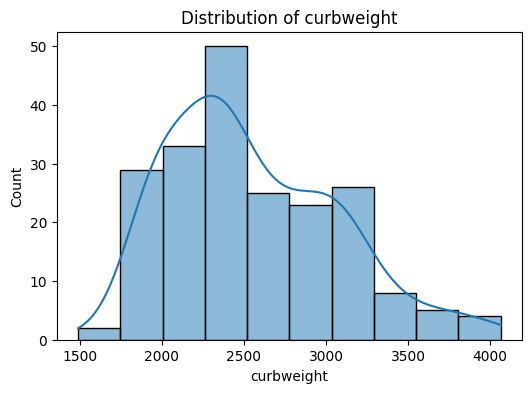

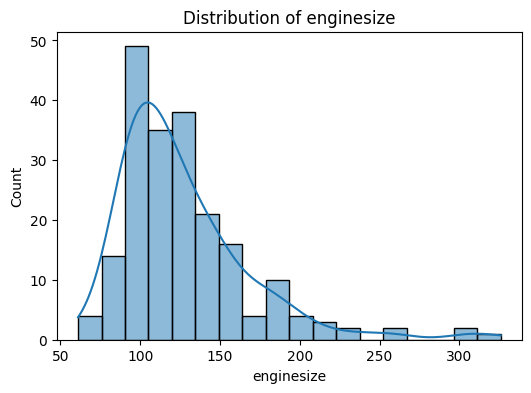

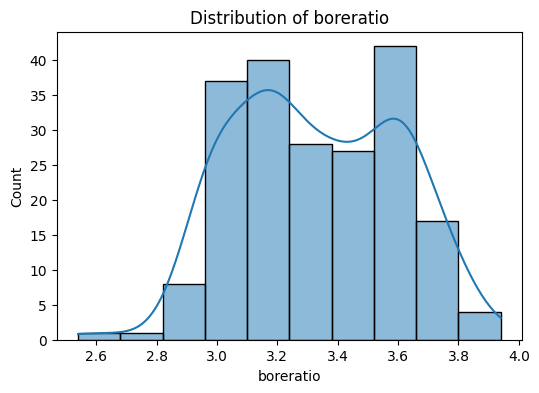

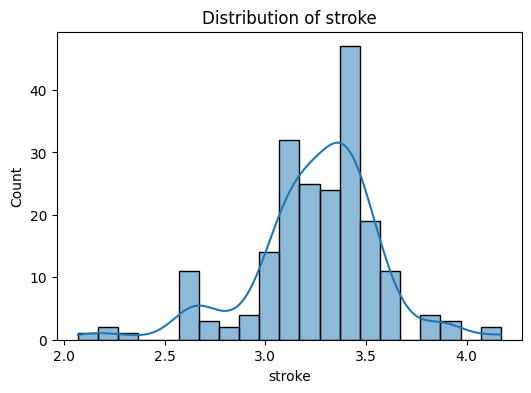

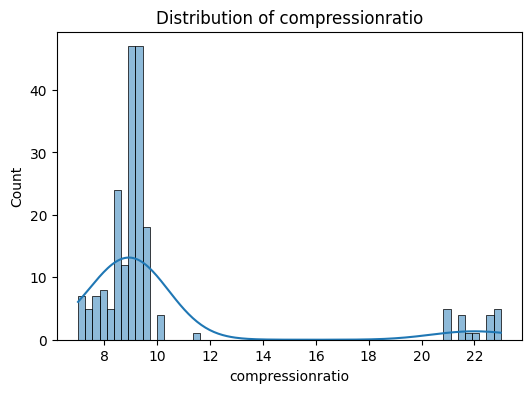

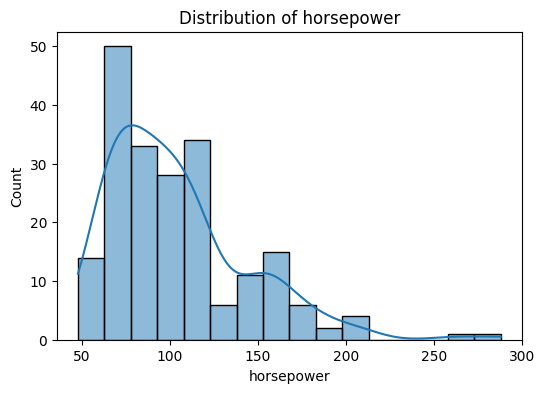

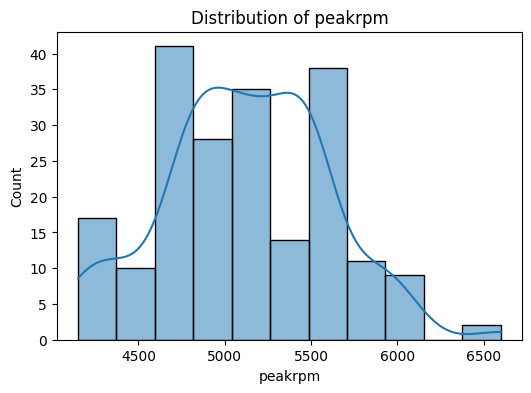

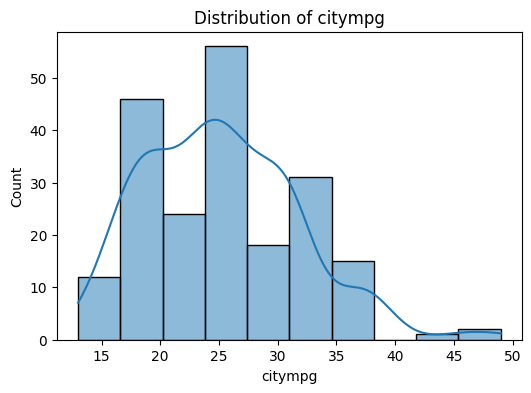

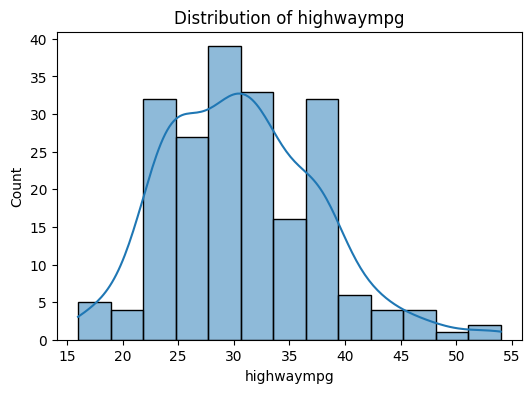

In [ ]:
# distribution num_cols
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#Univariate Analysis – Numerical Features
1. Price

Distribution: Right-skewed.

Insight: Most cars are priced below $15,000, while a few luxury cars exceed $30,000, indicating possible outliers.

Note: Apply a log transformation if modeling, to reduce skewness.

2. Wheelbase

Distribution: Slightly right-skewed.

Insight: Majority of vehicles have a wheelbase between 95–100 inches, with a few larger models beyond 110 inches.

Note: Values are reasonable; normalization might be sufficient.

3. Symboling

Distribution: Multi-modal and discrete.

Insight: Represents categorical insurance risk levels rather than a continuous variable.

Note: Should be treated as a categorical feature in modeling.

4. Carlength

Distribution: Approximately normal.

Insight: Most car lengths range from 170–180 inches, with few long vehicles above 190 inches.

Note: Data appears consistent; standardization (z-score) can be applied if needed.
5. Carwidth

Distribution: Nearly normal with a slight right skew.

Insight: Most vehicles have widths between 64–67 inches, with a few wider models above 70 inches.

Note: Data looks consistent; normalization or standardization can be applied.
6. Curbweight

Distribution: Right-skewed.

Insight: Majority of vehicles weigh between 2,000–3,000 lbs, with heavier luxury cars reaching above 3,500 lbs.

Note: Outliers may exist; consider scaling or transformation for modeling.

7. Enginesize

Distribution: Strongly right-skewed.

Insight: Most cars have small to mid-size engines (under 150), while a few high-performance cars have engines over 250.

Note: Log transformation could help normalize the variable.

8. Carheight

Distribution: Approximately normal, slightly left-skewed.

Insight: Most vehicles have heights between 52–56 inches, with very few shorter or taller cars.

Interpretation: Indicates a balanced range of compact to mid-size cars, with minimal extreme values.

Note: No major outliers; normalization or standardization is appropriate if used in modeling.

9. Boreratio

Distribution: Approximately normal.

Insight: Most values range between 3.0 and 3.6, suggesting consistent engine bore proportions across models.

Note: No major outliers; normalization is optional.

10. Compressionratio

Distribution: Highly right-skewed.

Insight: Most cars have a compression ratio around 8–10, but a few models have very high ratios (above 20).

Note: Apply log transformation or consider capping extreme values.

11. Stroke

Distribution: Roughly normal with mild variation.

Insight: Majority of vehicles have stroke values between 3.0 and 3.5, indicating similar piston stroke design.

Note: Data appears stable; standardization is suitable.
12. Horsepower

Distribution: Strongly right-skewed.

Insight: Most cars produce under 120 HP, while high-performance vehicles reach over 200 HP.

Note: Contains clear outliers; transformation or binning may be needed for modeling.

13. Peakrpm

Distribution: Approximately normal with slight right skew.

Insight: Most vehicles reach peak revolutions between 4,800 and 5,500 rpm, with only a few exceeding 6,000.

Note: Values are consistent; normalization or standardization can be applied.

14. Citympg

Distribution: Right-skewed.

Insight: The majority of cars have city mileage between 20–30 mpg, while a few highly efficient models reach up to 45–50 mpg.

Note: Mild skewness; scaling or transformation may help.

15. Highwaympg

Distribution: Nearly normal.

Insight: Most highway mileage values fall between 25–40 mpg, showing a balanced distribution across vehicle types.

Note: Data is stable; standardization is sufficient for modeling.



In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


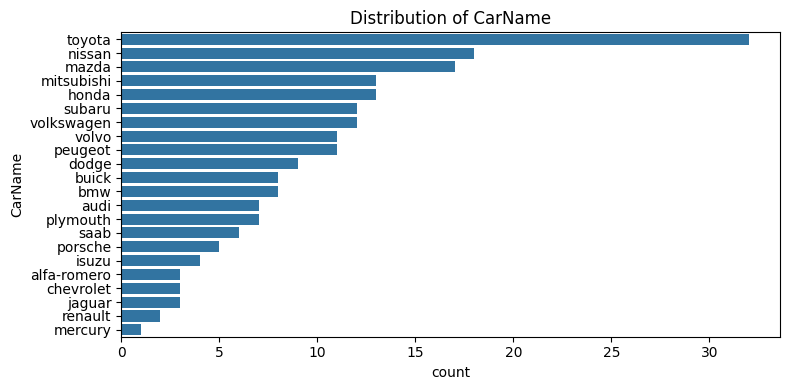

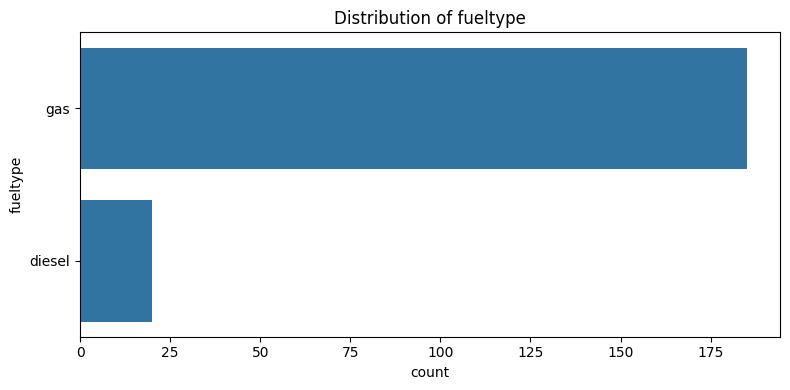

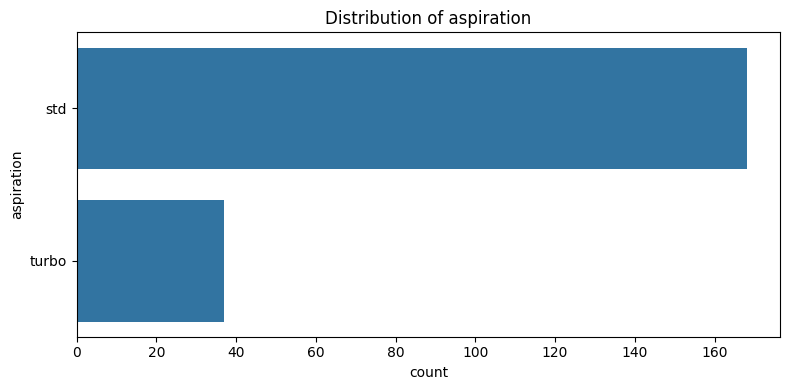

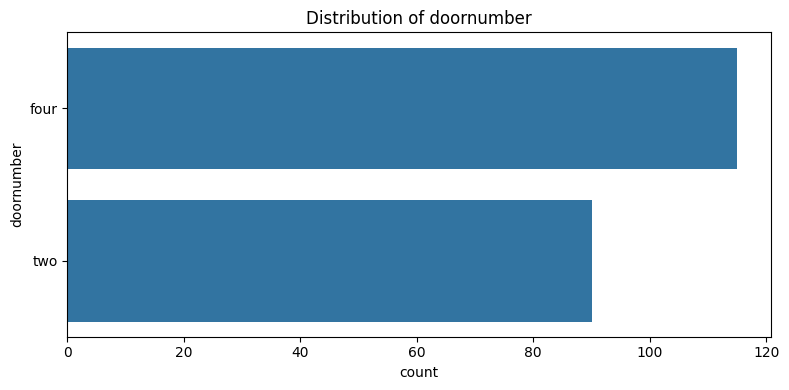

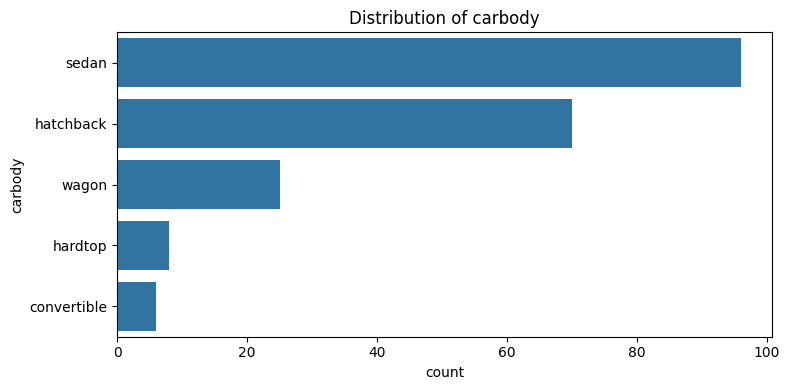

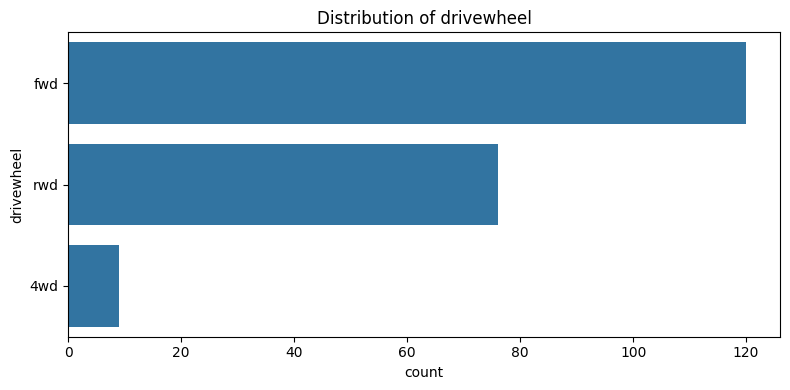

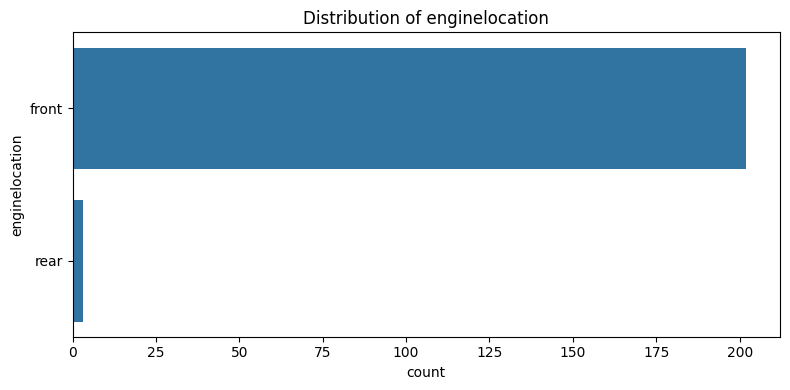

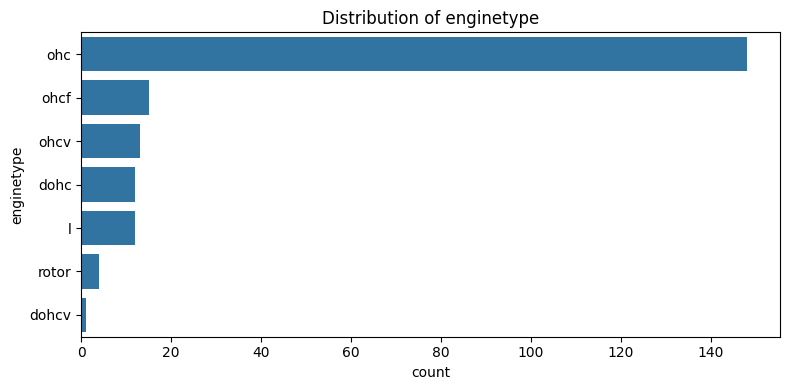

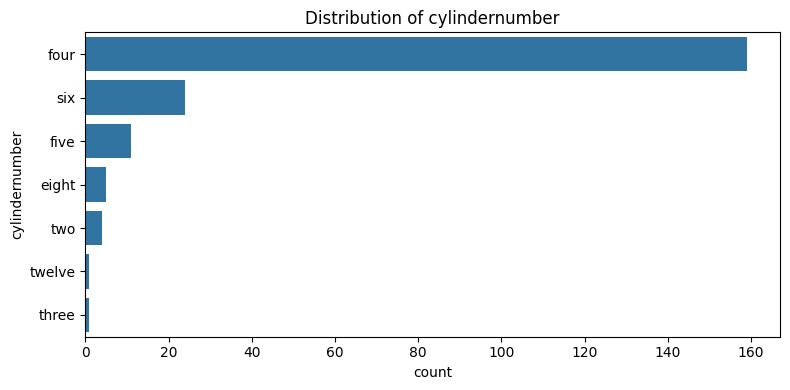

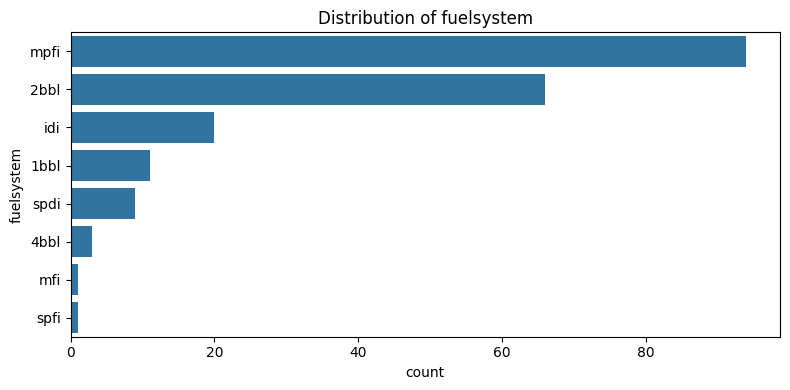

In [ ]:
# distribution categorical features
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Univariate Analysis – Categorical Features
1. CarName

Insight:
Toyota is the most frequent brand in the dataset, followed by Nissan, Mazda, and Mitsubishi.
Brands such as Mercury, Renault, and Jaguar appear least frequently.

Interpretation:
The dataset is dominated by Japanese brands, which may influence overall car price and fuel efficiency trends.

2. Fueltype

Insight:
The majority of cars use gasoline (gas), while only a small portion use diesel.

Interpretation:
The dataset mainly reflects gas-based vehicle performance, so comparisons with diesel cars may be limited.

3. Aspiration

Insight:
Most vehicles have standard (std) aspiration systems, while a smaller proportion are turbocharged (turbo).

Interpretation:
Turbocharged engines are less common but may contribute to higher horsepower and price variability.

4. Doornumber

Insight:
Cars with four doors slightly outnumber those with two doors.

Interpretation:
The dataset includes a balanced mix of family (4-door) and compact/sporty (2-door) vehicles.

5. Carbody

Insight:
The sedan body type is the most common in the dataset, followed by hatchback and wagon.
Hardtop and convertible models are relatively rare.

Interpretation:
The dataset mainly consists of practical, everyday-use cars, while luxury or sports types (like convertibles) are underrepresented.

6. Enginelocation

Insight:
Nearly all vehicles have their engine located in the front, with only a very small number having rear engines.

Interpretation:
The data reflects typical car designs — front-engine configurations are standard due to cost efficiency and easier maintenance.

7. Drivewheel

Insight:
Front-wheel drive (fwd) cars dominate, followed by rear-wheel drive (rwd).
Four-wheel drive (4wd) cars are very few in number.

Interpretation:
The dataset mostly represents urban or compact vehicles suited for everyday driving rather than off-road or performance vehicles.

8. Enginetype

Insight:
The OHC (Overhead Camshaft) engine type dominates the dataset, followed by OHCF, OHCV, and DOHC types.
Other types such as rotor, L, and DOHCV are very rare.

Interpretation:
Most cars use OHC engines, which are efficient and widely used in standard vehicles.

9. Cylindernumber

Insight:
Cars with four cylinders are the most common, making up the majority of the dataset.
Other configurations like six, five, or eight cylinders appear much less frequently.

Interpretation:
The dataset mainly consists of compact or mid-range vehicles optimized for fuel efficiency rather than high performance.

10. Fuelsystem

Insight:
The MPFI (Multi-Point Fuel Injection) system is the most prevalent, followed by 2BBL and IDI.
Other systems like SPFI and MFI occur rarely.

Interpretation:
Reflects the dominance of modern fuel injection systems over older carburetor-based systems.



# Bivariate Analysis

'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower'

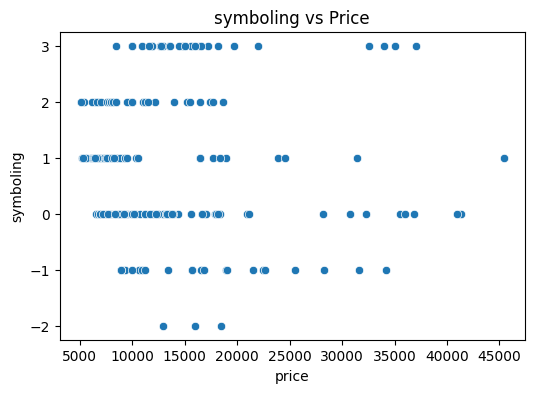

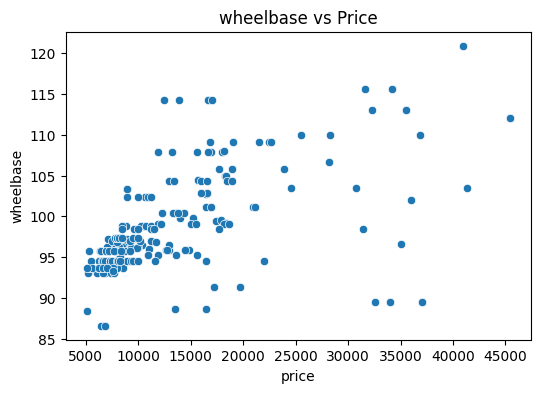

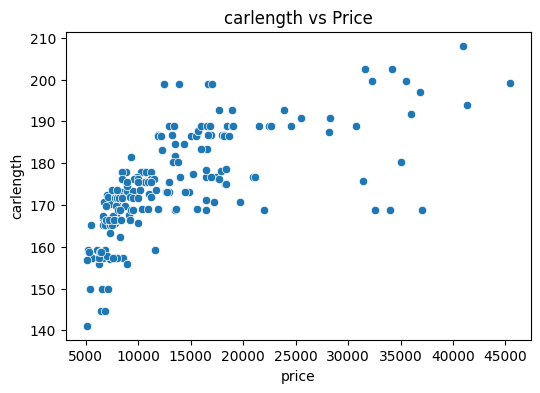

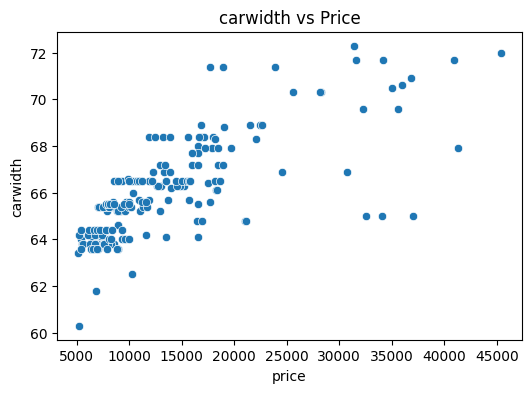

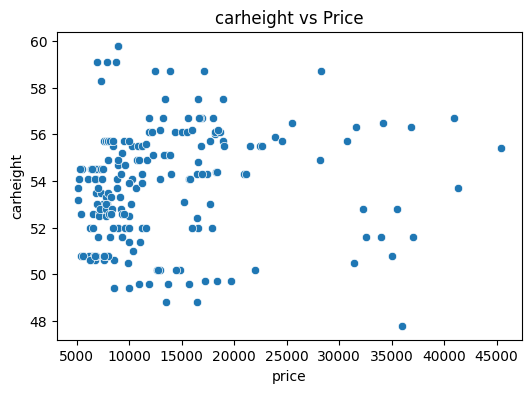

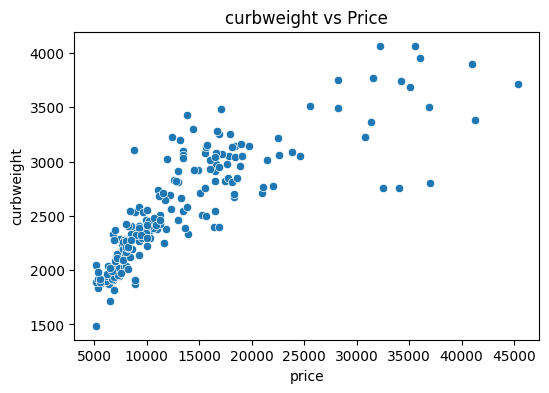

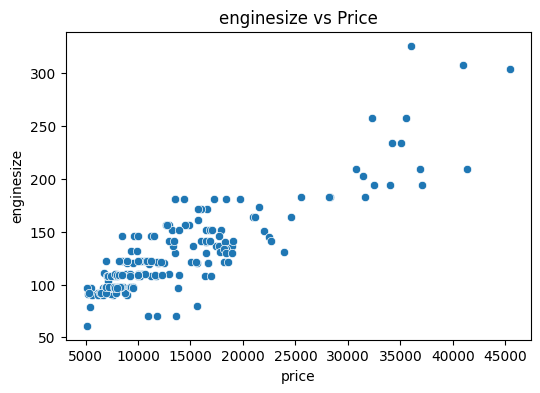

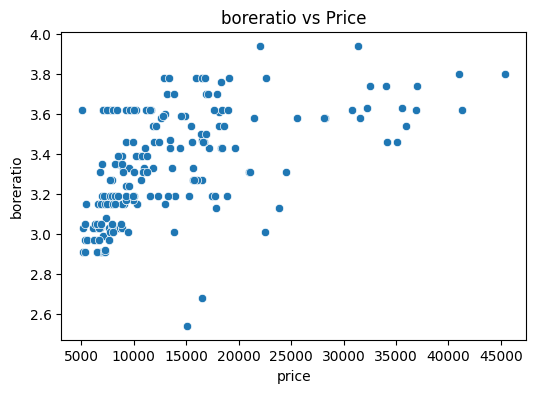

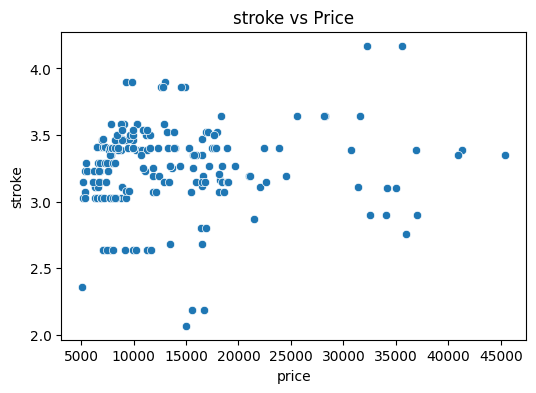

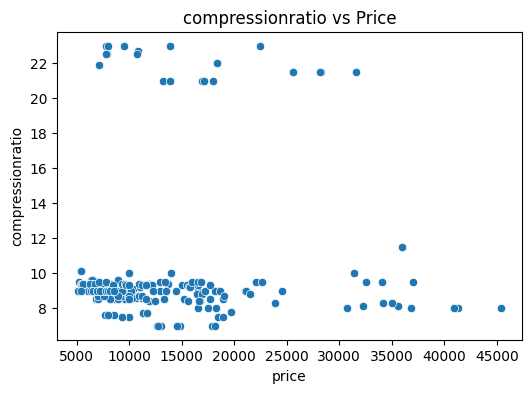

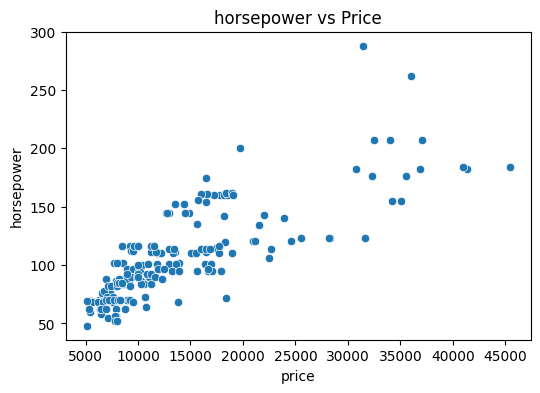

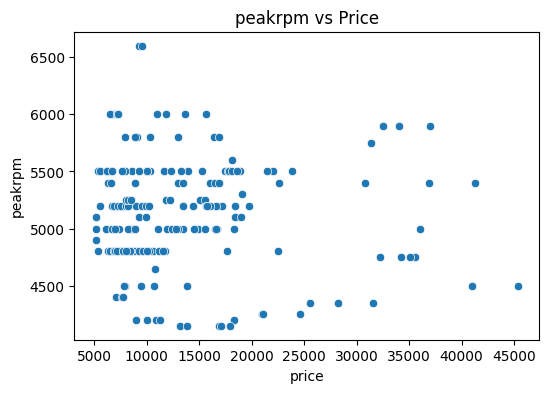

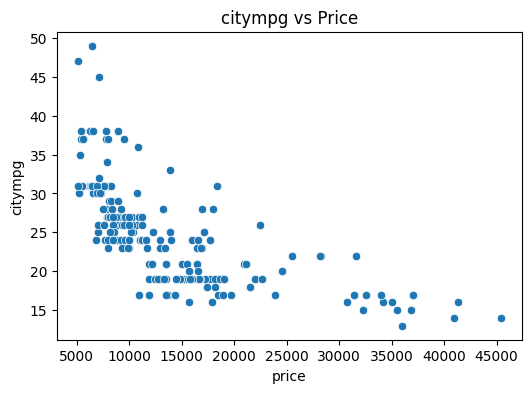

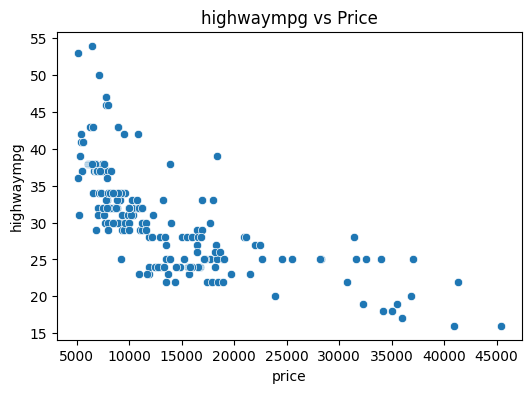

In [ ]:
# Numeric vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='price', y=col, data=df)
    plt.title(f'{col} vs Price')
    plt.show()

# Bivariate Analysis – Numerical Features

Overall Conclusion:
There is no strong linear relationship between most numerical features and price.
However, a slight negative correlation can be observed between price and fuel efficiency variables such as citympg and highwaympg — indicating that more expensive cars tend to have lower fuel efficiency.
Other features like compressionratio, boreratio, peakrpm, stroke, and carheight show weak or no visible correlation with price.

1. Carwidth

Insight: There is a strong positive correlation between carwidth and price.
Wider cars tend to be more expensive, indicating that carwidth is a strong indicator of luxury and performance level.

Interpretation: This suggests that car manufacturers often design premium or luxury vehicles with broader frames to enhance stability, comfort, and style — all factors that increase cost and market value.
2. Wheelbase

Insight: Wheelbase shows a positive relationship with price.
Cars with longer wheelbases generally have higher prices.

Interpretation: A longer wheelbase usually means more interior space and smoother ride quality, characteristics often found in luxury sedans and SUVs. Therefore, wheelbase length can be a good predictor of a vehicle’s market segment and pricing.

3. Carlength

Insight: Carlength demonstrates a moderate positive correlation with price.
Longer vehicles tend to cost more, though the correlation is not as strong as for carwidth or wheelbase.

Interpretation: Longer cars often offer more cabin or trunk space, but length alone does not fully determine luxury level or performance — explaining why the relationship is weaker compared to other size-related features.
4. Horsepower

Insight: There is a clear positive correlation between horsepower and price.
Cars with higher horsepower tend to have significantly higher prices.

Interpretation: Vehicles with more horsepower usually offer better acceleration and performance, which are key selling points in premium or sports models. This suggests that horsepower is a strong determinant of perceived vehicle quality and cost.

5. Curbweight

Insight: Curbweight shows a strong positive relationship with price.
Heavier cars generally have higher prices.

Interpretation: Heavier vehicles often incorporate larger frames, stronger materials, and more safety or comfort features, all of which contribute to increased cost. Thus, curbweight is likely associated with vehicle class and build quality.

6. Enginesize

Insight: Enginesize has one of the strongest correlations with price.
Cars with larger engine sizes are consistently more expensive.

Interpretation: Larger engines typically provide greater power output and are found in high-performance or luxury vehicles. This reinforces enginesize as a critical predictor of price, reflecting both performance capability and brand positioning.


In [ ]:
number_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

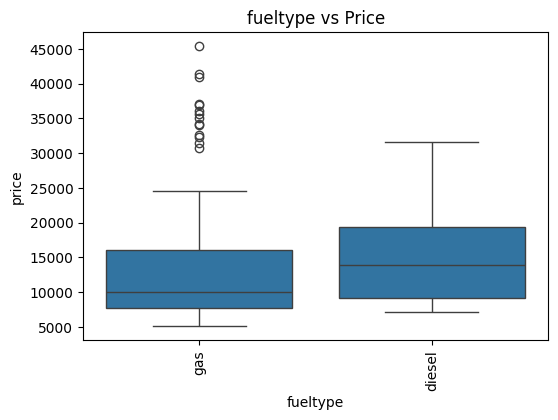

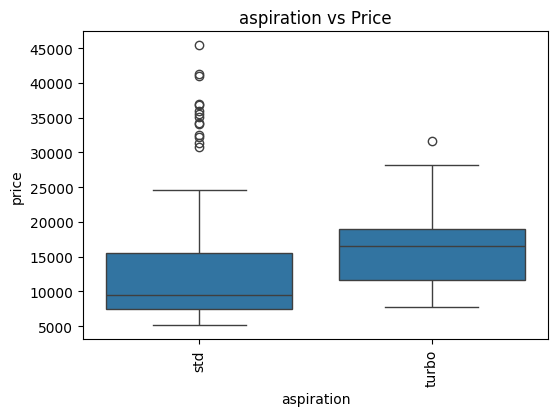

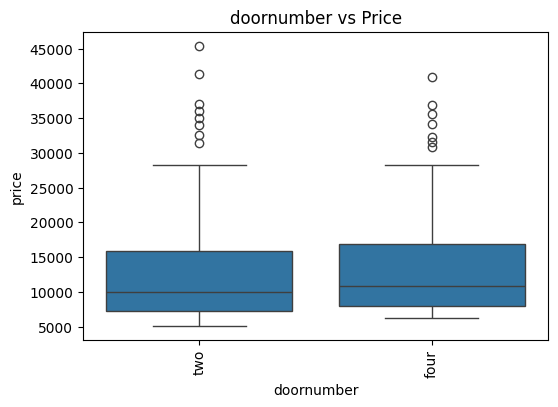

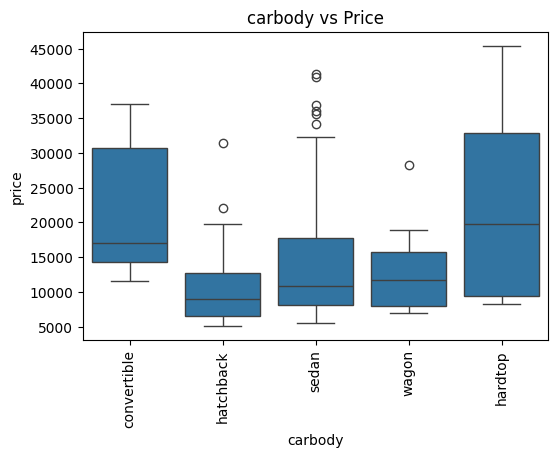

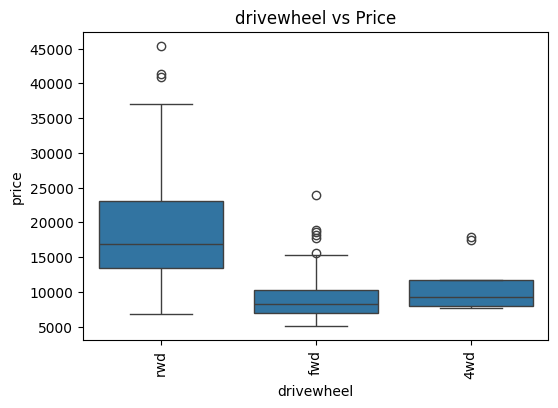

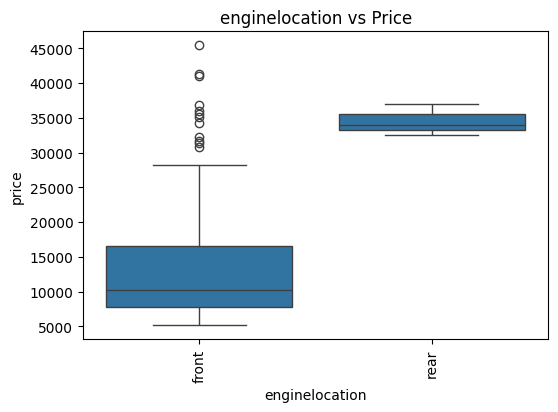

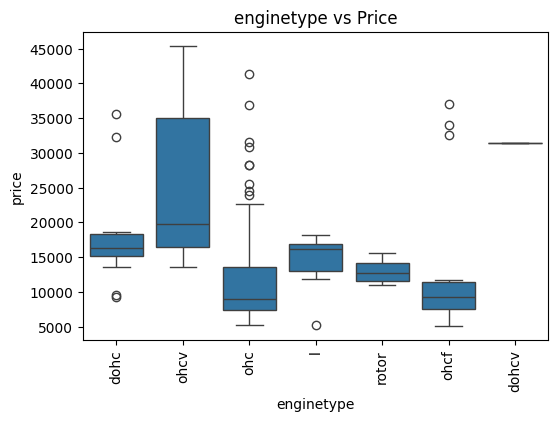

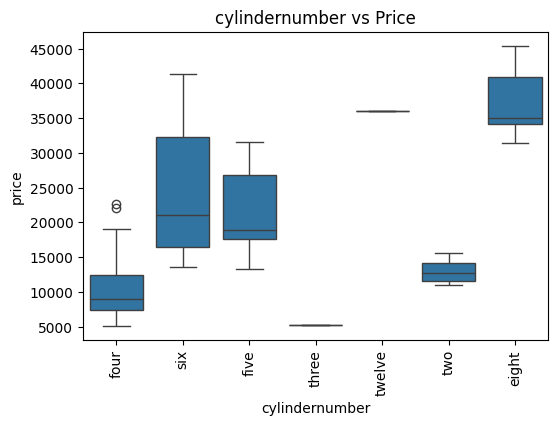

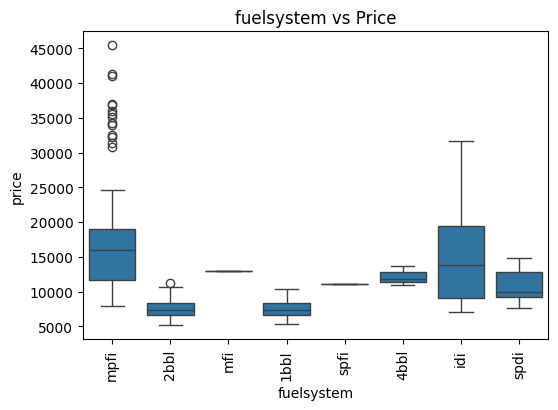

In [ ]:
# categorical feature vs target feature
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=90)
    plt.show()

1. Doornumber

Insight: There is little difference in price between cars with two and four doors.
Interpretation: The number of doors does not appear to significantly affect the car’s price. This suggests that other features—such as brand, engine, or performance—play a more dominant role in determining value.

2. Fueltype

Insight: Diesel cars generally have slightly higher prices than gas cars.
Interpretation: Diesel engines tend to offer better fuel efficiency and durability, which may increase production costs and thus lead to higher prices compared to gasoline vehicles.

3. Enginelocation

Insight: Cars with rear engine placement are significantly more expensive than those with front engines.
Interpretation: Rear-engine configurations are typically found in sports or luxury models (e.g., performance-focused designs), explaining their substantially higher price range.

4. Aspiration

Insight: Turbocharged cars tend to be priced higher than standard (NA) aspiration cars.
Interpretation: Turbo engines provide enhanced power and performance efficiency, making them more desirable and costly due to advanced engineering and performance tuning.
1. Fuelsystem

Insight: The MPFI (Multi-Point Fuel Injection) system is associated with higher car prices, while systems like 2bbl, 1bbl, and mfi correspond to lower-priced models.
Interpretation: MPFI engines deliver better performance and fuel efficiency, which increases manufacturing complexity and cost — leading to higher car prices compared to simpler fuel systems.

2. Carbody

Insight: Convertible and hardtop cars tend to have the highest prices, while hatchback and sedan models are more affordable.
Interpretation: The price variation reflects market positioning — convertibles and hardtops target the luxury segment, whereas hatchbacks and sedans serve practical, economy-focused consumers.

3. Drivewheel

Insight: Cars with rwd (rear-wheel drive) generally show higher prices than fwd or 4wd vehicles.
Interpretation: Rear-wheel drive systems are commonly used in performance and luxury cars, offering better handling and power distribution — which contributes to their higher value.

4. Cylindernumber

Insight: Cars with eight or twelve cylinders are significantly more expensive, while four-cylinder engines dominate lower price ranges.
Interpretation: More cylinders typically mean higher engine capacity, smoother performance, and greater power output — all characteristics of premium, high-performance vehicles.

5. Enginetype

Insight: DOHC (Double Overhead Camshaft) and DOHCV engines correspond to higher-priced cars, while OHCF and rotor types are generally in the lower range.
Interpretation: Advanced engine designs like DOHC support superior valve control and efficiency, improving both performance and cost — hence their strong association with premium car models.

# Feature Engineering

**Data Preprocessing**

Before feeding the data into the model, all features were encoded and scaled to ensure consistent value ranges.

The features selected for model training include:
wheelbase, carlength, carwidth, curbweight, enginesize, and horsepower — all showing strong positive correlation with price, as seen in the heatmap.

**Training Process**

The dataset was divided into training (80%) and testing (20%) subsets.

All models were trained using their default hyperparameters as the initial setup.

In [ ]:
# Drop unnecessary columns
drop_col = ['car_ID','CarName'] if 'CarName' in df.columns else []
df = df.drop(columns=drop_col, errors = 'ignore')


In [ ]:
# Encode categorical features
df = pd.get_dummies(df, drop_first = True)
df = df.astype('int64')
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88,168,64,48,2548,130,3,2,9,...,0,0,0,0,0,0,0,1,0,0
1,3,88,168,64,48,2548,130,3,2,9,...,0,0,0,0,0,0,0,1,0,0
2,1,94,171,65,52,2823,152,2,3,9,...,0,0,0,0,0,0,0,1,0,0
3,2,99,176,66,54,2337,109,3,3,10,...,0,0,0,0,0,0,0,1,0,0
4,2,99,176,66,54,2824,136,3,3,8,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Train, test, split
selected_features = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']
target = ['price']
X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape:  (164, 6) (164, 1)
Test shape:  (41, 6) (41, 1)


In [ ]:
# Scale data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower
0,0.620690,0.534483,0.454545,0.392078,0.250000,0.084746
1,0.724138,0.724138,0.636364,0.558968,0.195312,0.182203
2,0.310345,0.431034,0.181818,0.205162,0.085938,0.042373
3,0.275862,0.362069,0.181818,0.067646,0.105469,0.072034
4,0.344828,0.396552,0.363636,0.209168,0.156250,0.144068


# Model Training
Modes: Random Forest Regressor

CatBoost Regressor

XGBoost Regressor

Gradient Boosting Regressor

Linear Regressor

LightGBM Regressor

**Interpretation**

These models were chosen to compare both tree-based ensemble methods (e.g., Random Forest, XGBoost, LightGBM, CatBoost) and linear regression,
allowing an evaluation of how complex non-linear models perform versus simpler linear ones on this dataset.

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(
        n_estimators = 200,
        random_state = 42
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        n_estimators = 200,
        random_state = 42
    ),
    'XGBRegressor': XGBRegressor(
        n_estomators = 200,
        random_state = 42
    ),
    'LGBMRegressor': LGBMRegressor(
        n_estomators = 200,
        random_state = 42
    ),
    'CatBoostRegressor': CatBoostRegressor(
        n_estimators = 200,
        random_state = 42
    )
}
results = {}

for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)

  mae = mean_absolute_error(y_test, y_pred)
  mse = int(mean_squared_error( y_test, y_pred))
  rmse = int(np.sqrt(mse))
  r2 = r2_score(y_test, y_pred)
  results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
compared_result = pd.DataFrame(results).T.round(3)
best_model = compared_result.sort_values(by='R2', ascending =False)
print('Result Table ',compared_result)
print('Best Model: ', best_model.index[0])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[LightGBM] [Warning] Unknown parameter: n_estomators
[LightGBM] [Warning] Unknown parameter: n_estomators
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 6
[LightGBM] [Info] Start training from score 13223.408537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estomators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


EVALUATION AND RESULT

Model	                           MAE	      MSE	        RMSE	        R²

Linear Regression               2699	  14,248,520	    3774.0	      0.820

Random Forest Regressor	        1308	  3,807,549	      1951.0	      0.952

Gradient Boosting Regressor     1620	  7,410,204	      2722.0	      0.906

XGB Regressor                 	1577	  5,458,101	      2336.0      	0.931

LGBM Regressor	                2228	  15,193,283	    3897.0      	0.808

CatBoost Regressor            	1266	  5,231,102	      2287.0	      0.934

**Model Comparison**

From the table, several regression models were tested to predict car prices.
The performance metrics (MAE, MSE, RMSE, R²) indicate that:

Random Forest Regressor delivers the best performance among all models.

MAE = 1308, RMSE = 1951.0, R² = 0.952

It achieves the lowest prediction error and the highest R² score, meaning it fits the data very well.

CatBoost Regressor also performs strongly, with an R² of 0.934, but slightly below Random Forest.

Linear Regression performs the weakest, showing the highest error and lowest accuracy, suggesting the relationship between features and price is non-linear.

**Interpretation**

The Random Forest Regressor model captures complex relationships between car features and price better than linear or boosting models.
This implies that car price prediction benefits from non-linear, ensemble-based approaches that can handle interaction effects among variables.

**Conclusion**

✅ Random Forest Regressor is the most accurate and reliable model for predicting car prices in this dataset.

/tmp/ipython-input-4210259765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = best_model.index, y = best_model['R2'], palette = 'coolwarm')


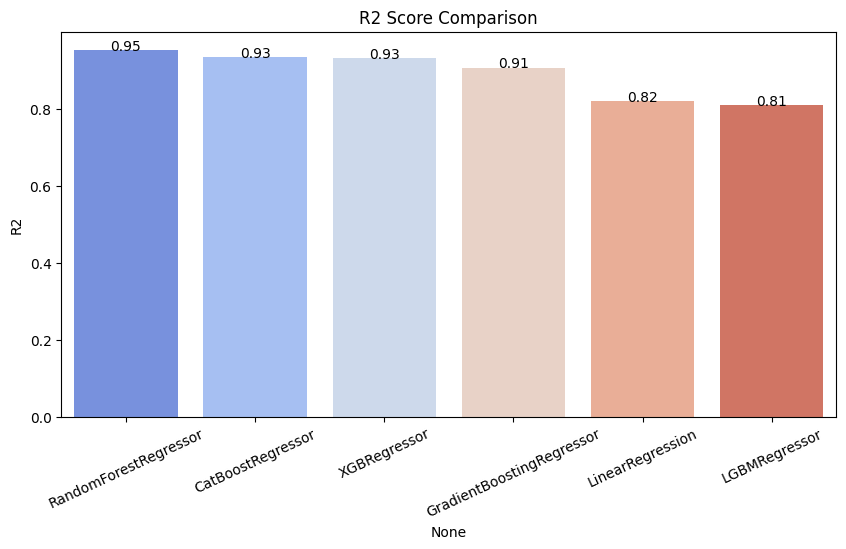

In [ ]:
# Visualize R2 score of each models:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = best_model.index, y = best_model['R2'], palette = 'coolwarm')
for p in ax.patches:
  ax.annotate(str(round(p.get_height(),2)),
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha='center'
              )

plt.title('R2 Score Comparison')
plt.xticks(rotation = 25)
plt.show()

# Scatter plots ( Actuals vs Predicted)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


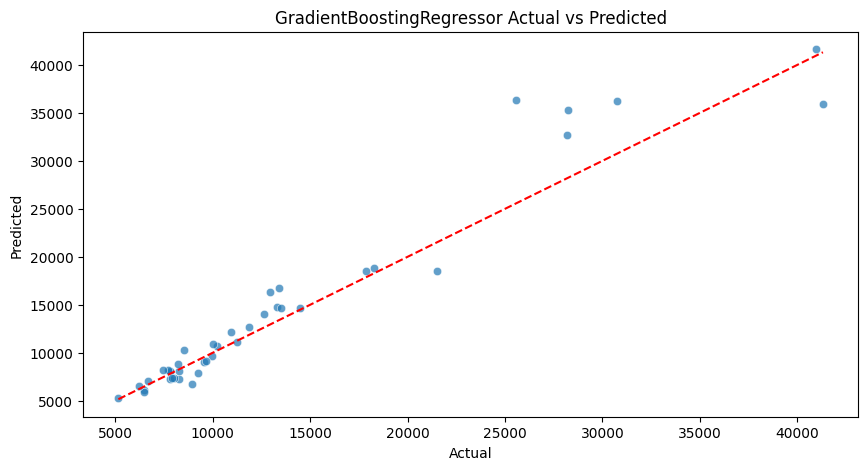

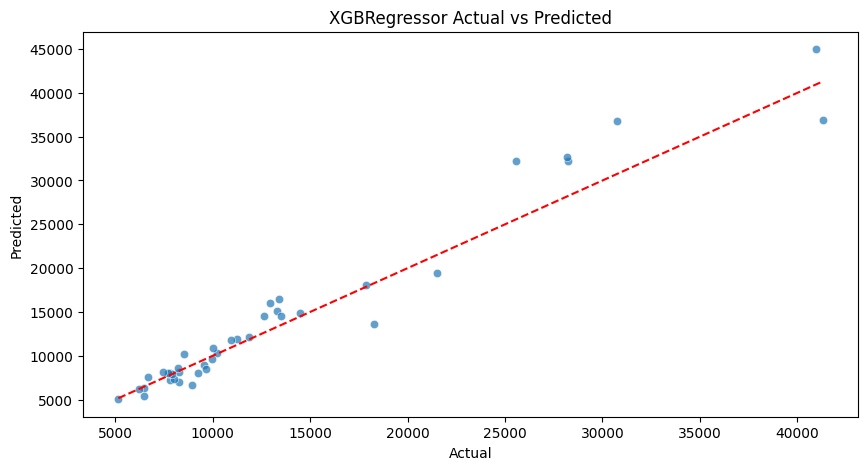

Learning rate set to 0.113864
0:	learn: 7164.7707338	total: 6.18ms	remaining: 1.23s
1:	learn: 6695.7215885	total: 7.04ms	remaining: 697ms
2:	learn: 6210.9465805	total: 10.1ms	remaining: 664ms
3:	learn: 5807.8891445	total: 10.8ms	remaining: 527ms
4:	learn: 5419.9425699	total: 11.2ms	remaining: 436ms
5:	learn: 5104.3036384	total: 11.8ms	remaining: 382ms
6:	learn: 4768.3957779	total: 12.5ms	remaining: 344ms
7:	learn: 4506.1206860	total: 13.1ms	remaining: 315ms
8:	learn: 4246.9636252	total: 13.7ms	remaining: 291ms
9:	learn: 3996.2856966	total: 15.8ms	remaining: 300ms
10:	learn: 3726.5509480	total: 16.5ms	remaining: 283ms
11:	learn: 3525.7533842	total: 16.9ms	remaining: 265ms
12:	learn: 3358.1414472	total: 17.3ms	remaining: 249ms
13:	learn: 3226.8322435	total: 17.7ms	remaining: 235ms
14:	learn: 3097.2930822	total: 18.3ms	remaining: 226ms
15:	learn: 2975.8385151	total: 19ms	remaining: 218ms
16:	learn: 2892.9672092	total: 19.7ms	remaining: 212ms
17:	learn: 2790.8518916	total: 20.2ms	remaining

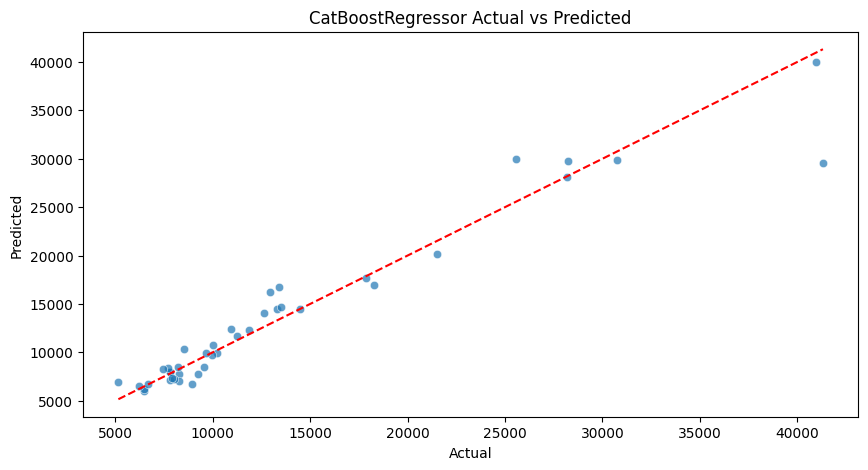

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


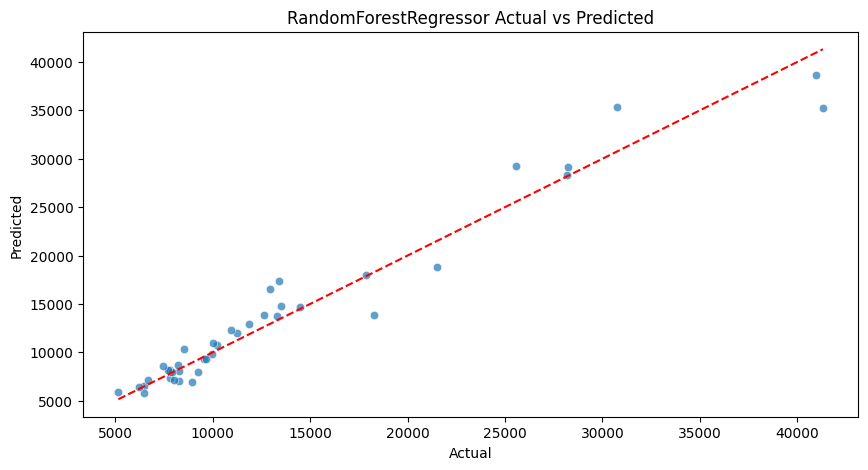

In [ ]:
model_selected = {
    'GradientBoostingRegressor': GradientBoostingRegressor(
        n_estimators = 200,
        random_state = 42
    ),
    'XGBRegressor': XGBRegressor(
        n_estimators = 200,
        random_state = 42
    ),
    'CatBoostRegressor': CatBoostRegressor(
        n_estimators = 200,
        random_state = 42
    ),
    'RandomForestRegressor': RandomForestRegressor(
        n_estimators = 200,
        random_state = 42
    )
}

for name, model in model_selected.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_test_1d = np.ravel(y_test)
  y_pred_1d = np.ravel(y_pred)
  plt.figure(figsize=(10,5))
  sns.scatterplot(x = y_test_1d, y = y_pred_1d, alpha = 0.7)
  plt.title(f'{name} Actual vs Predicted')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.plot([y_test_1d.min(), y_test_1d.max()], [y_test_1d.min(), y_test_1d.max()], 'r--')
  plt.show()

##EVALUATION AND RESULT

Scatter Plot Comparison of Top 4 Models (Highest R² Scores)

The scatter plots display the relationship between actual car prices and predicted prices for the top-performing models:
Gradient Boosting, CatBoost, XGBoost, and Random Forest Regressor.

The red dashed line represents a perfect prediction (Actual = Predicted).

**Observations**

Random Forest Regressor shows the closest alignment between predicted and actual values.
Most of its data points lie very near the diagonal line, indicating high prediction accuracy and strong model fit.

CatBoost and XGBoost also show good performance, with data points clustering close to the line, but with slightly more variance.

Gradient Boosting Regressor performs well but exhibits larger deviations for higher price values.

**Interpretation**

The scatter plots confirm that Random Forest Regressor not only achieves the highest R² score (0.952) but also visually demonstrates superior predictive accuracy.
This indicates that the model captures both linear and non-linear relationships effectively, minimizing errors across all price ranges.

Conclusion

✅ Random Forest Regressor is the best-performing model, offering the most reliable and consistent predictions for car price estimation.

# tuning hyperparameter
gradient boosting, random forest, XGBoost, catboost

In [ ]:
# Gradient Boosting
param_gb = {'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                       param_grid=param_gb, scoring='f1', cv=3, n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)
best_gb = grid_gb.best_estimator_
print('Gradient Boosting best params:', grid_gb.best_params_)


Gradient Boosting best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
# random forest
param_rf = {
    'n_estimators' : [100,200],
    'max_depth' : [None, 10,20,30],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2,]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state = 42),
                       param_grid = param_rf, scoring = 'r2',
                       cv = 3,
                       n_jobs = -1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
print('Random Forest best params:', grid_rf.best_params_)


Random Forest best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# XGBRegressor
param_xgb = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.05,0.1],
    'max_depth' :[3,5],
    'subsample' : [0.5,0.7,1]
}
grid_xgb = GridSearchCV(XGBRegressor(random_state = 42),
                        param_grid = param_xgb,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1)
grid_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_xgb.best_estimator_
print('XGBRegressor best params:', grid_xgb.best_params_)

XGBRegressor best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}


In [ ]:
# CatBoost
param_cat = {
    'depth': [6,8,10],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations' : [300,400,500]
}
grid_cat = GridSearchCV(CatBoostRegressor(),
                        param_grid = param_cat,
                        cv = 2,
                        n_jobs = -1)
grid_cat.fit(X_train_scaled, y_train)
best_cat = grid_cat.best_estimator_
print('CatBoost best params:', grid_cat.best_params_)

0:	learn: 7252.8037455	total: 1.09ms	remaining: 437ms
1:	learn: 6899.5469972	total: 1.79ms	remaining: 356ms
2:	learn: 6421.2823343	total: 2.3ms	remaining: 305ms
3:	learn: 6077.2079568	total: 2.85ms	remaining: 282ms
4:	learn: 5739.2890769	total: 3.34ms	remaining: 264ms
5:	learn: 5451.6735412	total: 3.79ms	remaining: 249ms
6:	learn: 5147.0169463	total: 4.31ms	remaining: 242ms
7:	learn: 4924.8858101	total: 4.75ms	remaining: 233ms
8:	learn: 4610.5991904	total: 5.19ms	remaining: 226ms
9:	learn: 4369.6248762	total: 5.68ms	remaining: 222ms
10:	learn: 4119.6579023	total: 6.16ms	remaining: 218ms
11:	learn: 3929.5463418	total: 6.72ms	remaining: 217ms
12:	learn: 3760.3999452	total: 7.33ms	remaining: 218ms
13:	learn: 3578.2001295	total: 7.94ms	remaining: 219ms
14:	learn: 3433.0808806	total: 8.39ms	remaining: 215ms
15:	learn: 3313.2216945	total: 8.85ms	remaining: 212ms
16:	learn: 3191.7045279	total: 9.32ms	remaining: 210ms
17:	learn: 3050.6711879	total: 9.74ms	remaining: 207ms
18:	learn: 2937.73331

In [ ]:
# evaluation
models = {
    'GradientBoostingRegressor': best_gb,
    'RandomForestRegressor' : best_rf,
    'XGBRegressor' : best_xgb,
    'CatBoostRegressor' :best_cat
}
for name, model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)
  mae = mean_absolute_error(y_test, y_pred)
  mse = int(mean_squared_error(y_test, y_pred))
  rmse = int(np.sqrt(mse))
  r2 = r2_score(y_test, y_pred)
  print(f'Model: {name}')
  print(f'MAE: {mae}')
  print(f'MSE: {mse}')
  print(f'RMSE: {rmse}')
  print(f'R2: {r2}')


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: GradientBoostingRegressor
MAE: 1526.9629243697445
MSE: 4874845
RMSE: 2207
R2: 0.9382493990988905
Model: RandomForestRegressor
MAE: 1421.6920207744192
MSE: 4314052
RMSE: 2077
R2: 0.9453530725354157
Model: XGBRegressor
MAE: 1705.330810546875
MSE: 5964858
RMSE: 2442
R2: 0.9244419932365417
0:	learn: 7252.8037455	total: 1.22ms	remaining: 487ms
1:	learn: 6899.5469972	total: 1.87ms	remaining: 372ms
2:	learn: 6421.2823343	total: 2.29ms	remaining: 303ms
3:	learn: 6077.2079568	total: 2.79ms	remaining: 276ms
4:	learn: 5739.2890769	total: 4.57ms	remaining: 361ms
5:	learn: 5451.6735412	total: 5.02ms	remaining: 330ms
6:	learn: 5147.0169463	total: 5.93ms	remaining: 333ms
7:	learn: 4924.8858101	total: 8.1ms	remaining: 397ms
8:	learn: 4610.5991904	total: 8.55ms	remaining: 372ms
9:	learn: 4369.6248762	total: 9.18ms	remaining: 358ms
10:	learn: 4119.6579023	total: 9.88ms	remaining: 349ms
11:	learn: 3929.5463418	total: 12ms	remaining: 387ms
12:	learn: 3760.3999452	total: 12.4ms	remaining: 368ms
13:	

1. Model Performance Improvement (Before vs After Tuning)

Model	Before Tuning (R²)	After Tuning (R²)	Before RMSE	After RMSE	Observation

Random Forest Regressor

Before Tuning (R²): 0.952

After Tuning (R²): 0.945

Before RMSE	After RMSE : 1951	/ 2077

**Observation**: Slight decrease in R² and slight increase in RMSE — may indicate mild overfitting was reduced.

**Gradient Boosting Regressor**

Before Tuning (R²): 0.906

After Tuning (R²): 0.938

Before RMSE	After RMSE : 2722	/ 2207

**Observation**: Clear improvement in both R² and RMSE — tuning significantly enhanced performance.

XGB Regressor
Before Tuning (R²): 0.931

After Tuning (R²): 0.924

Before RMSE	After RMSE : 2336	/ 2442

**Observation**: Minor decrease — model likely already well-optimized initially.

CatBoost Regressor

Before Tuning (R²): 0.934

After Tuning (R²): 0.940

Before RMSE	After RMSE : 2287	/ 2157

**Observation**: Slight improvement — better generalization after tuning.



2. Insights

Random Forest Regressor maintained strong overall performance with high accuracy, though tuning caused a minor drop in R², possibly due to reducing overfitting.

Gradient Boosting improved the most, suggesting that tuning hyperparameters (like learning rate, n_estimators, and max_depth) had a strong positive impact.

CatBoost showed slight enhancement, confirming its stability and robustness even before tuning.

XGBoost performance slightly decreased — the new parameters may have been less optimal than defaults.

3. Interpretation

After hyperparameter tuning:

Most models showed better balance between bias and variance.

Random Forest still achieved one of the best R² scores (0.945) and lowest RMSE, confirming its consistency and reliability.

CatBoost emerged as a strong competitor with a slightly higher R² than Gradient Boosting and XGB.

4. Conclusion

✅ Random Forest Regressor remains the most robust and accurate model overall, even after tuning.

⚙️ Gradient Boosting Regressor benefited the most from tuning and now performs comparably.

📈 CatBoost Regressor also showed reliable improvement with strong generalization.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


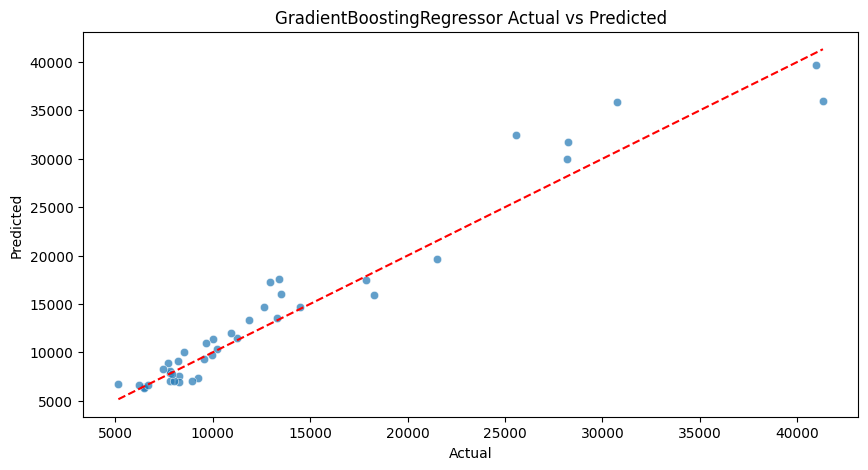

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


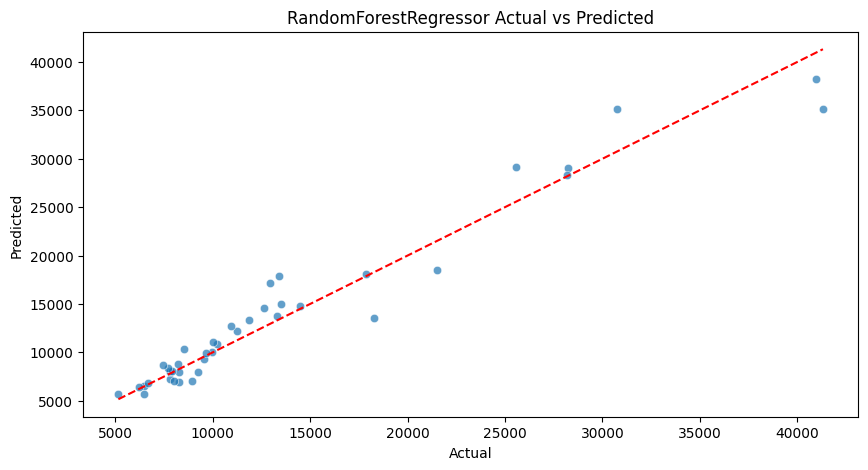

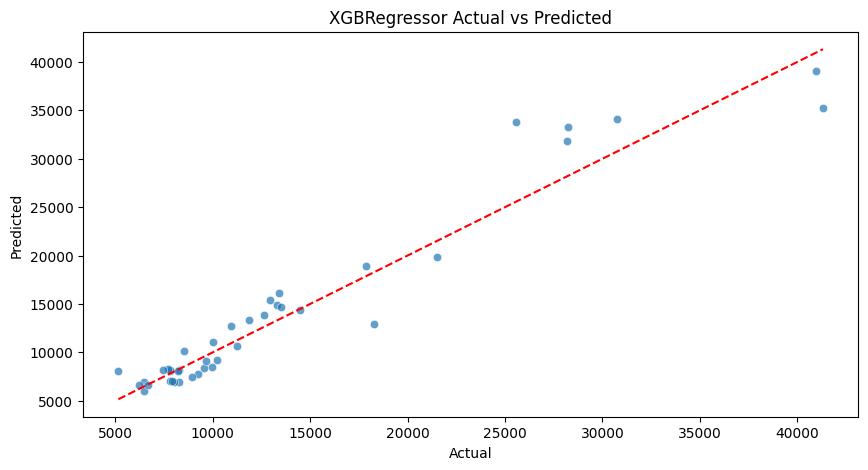

0:	learn: 7252.8037455	total: 1.64ms	remaining: 655ms
1:	learn: 6899.5469972	total: 4.61ms	remaining: 917ms
2:	learn: 6421.2823343	total: 5.06ms	remaining: 670ms
3:	learn: 6077.2079568	total: 5.48ms	remaining: 542ms
4:	learn: 5739.2890769	total: 6.21ms	remaining: 491ms
5:	learn: 5451.6735412	total: 6.96ms	remaining: 457ms
6:	learn: 5147.0169463	total: 7.36ms	remaining: 413ms
7:	learn: 4924.8858101	total: 7.75ms	remaining: 380ms
8:	learn: 4610.5991904	total: 8.21ms	remaining: 357ms
9:	learn: 4369.6248762	total: 8.6ms	remaining: 335ms
10:	learn: 4119.6579023	total: 9ms	remaining: 318ms
11:	learn: 3929.5463418	total: 9.4ms	remaining: 304ms
12:	learn: 3760.3999452	total: 9.8ms	remaining: 292ms
13:	learn: 3578.2001295	total: 10.2ms	remaining: 281ms
14:	learn: 3433.0808806	total: 10.6ms	remaining: 272ms
15:	learn: 3313.2216945	total: 11ms	remaining: 263ms
16:	learn: 3191.7045279	total: 11.4ms	remaining: 256ms
17:	learn: 3050.6711879	total: 11.8ms	remaining: 250ms
18:	learn: 2937.7333173	tota

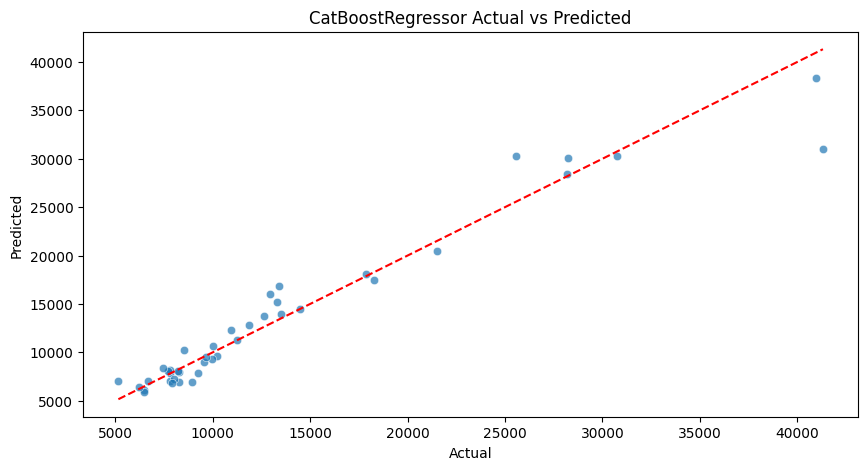

In [ ]:
model_selected = {
    'GradientBoostingRegressor': best_gb,
    'RandomForestRegressor' : best_rf,
    'XGBRegressor' : best_xgb,
    'CatBoostRegressor' :best_cat
}

for name, model in model_selected.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_test_1d = np.ravel(y_test)
  y_pred_1d = np.ravel(y_pred)
  plt.figure(figsize=(10,5))
  sns.scatterplot(x = y_test_1d, y = y_pred_1d, alpha = 0.7)
  plt.title(f'{name} Actual vs Predicted')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.plot([y_test_1d.min(), y_test_1d.max()], [y_test_1d.min(), y_test_1d.max()], 'r--')
  plt.show()

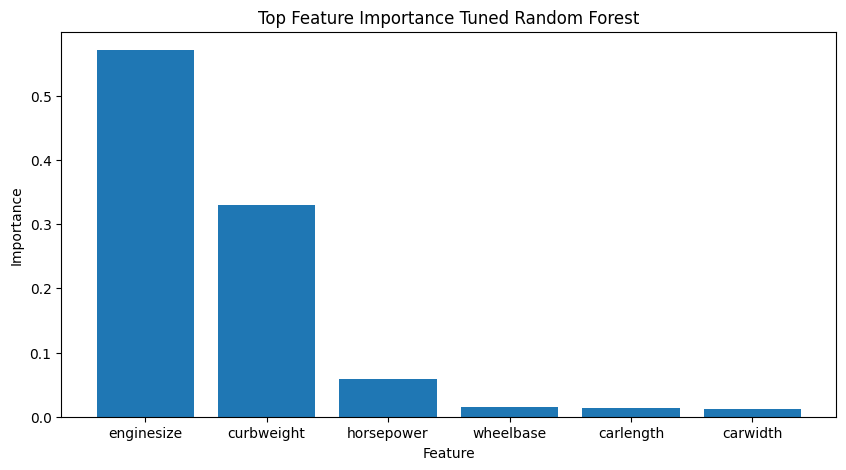

In [ ]:
#Feature Importance:
feature_importance = pd.Series(best_rf.feature_importances_, index = X_train.columns)
feature_importance = feature_importance.sort_values(ascending =False)
plt.figure(figsize = (10,5))
plt.bar(x=feature_importance.index, height = feature_importance.values)
plt.title('Top Feature Importance Tuned Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

**Insight:**

Enginesize is by far the most influential feature, contributing around 60% of the model’s predictive power.

Curbweight is the second most important feature, with about 30% importance.

Other features such as horsepower, carlength, wheelbase, and carwidth have minimal impact on predicting car prices.

**Interpretation:**

The results indicate that engine size and vehicle weight are the key determinants of car price — larger engines and heavier cars tend to correlate with higher prices.

Features like horsepower and car dimensions (length, width, wheelbase) have comparatively smaller effects, meaning price variations are less sensitive to these factors when other main attributes are known.

The Random Forest model effectively identifies these dominant factors, confirming that performance and structural size are critical price drivers in this dataset.